Mean Absolute Error: 211.921278789686
Mean Squared Error: 119606.06798291282


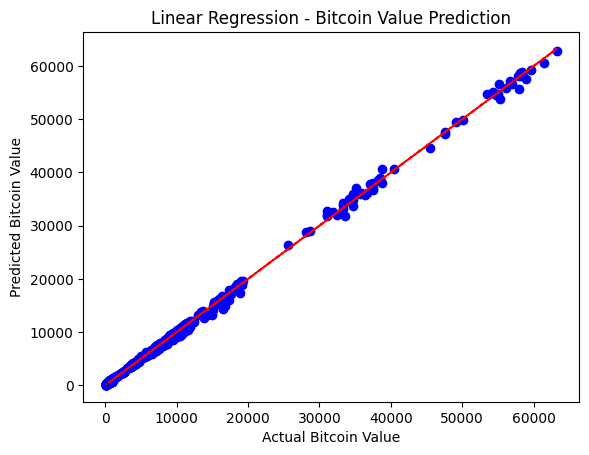

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv("12_coin_Bitcoin.csv")
# cleaning the data
data['target'] = (data['Low'] + data['High']) / 2
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].astype(int)

data = data.drop(['SNo', 'Name', 'Symbol', 'Open', 'Close'], axis=1)
data = data.dropna()

# Splitting features and target
X = data.drop(['Low', 'High', 'target'], axis=1)
y = data['target']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Ploting linear regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Bitcoin Value')
plt.ylabel('Predicted Bitcoin Value')
plt.title('Linear Regression - Bitcoin Value Prediction')
plt.show()

